In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from common import load_classes
#path = Path(Config.get_key('data_path')).expanduser()/'handwritten'
path = Path('.')
#bs = 4096
#tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, train='Train', valid='Validation', ds_tfms=tfms, size=32, bs=bs)
#learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [3]:
model_name = 'stage-1-resnet34-32px'
classes = load_classes(model_name)

In [4]:
#empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms()).normalize(imagenet_stats)
empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms())
learn = create_cnn(empty_data, models.resnet34)
# The model was created as DataParallel, therefore we need to load it as DataParallel for inference.
#learn.model = torch.nn.DataParallel(learn.model)

In [5]:
#learn.path = Path('.')
learn.load(model_name)

In [8]:
#! wget http://yourstorage.blob.core.windows.net/ficheros/e.png

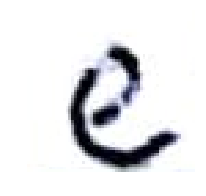

In [9]:
img = open_image("test/e.png")
img.show()

In [10]:
learn.predict(img)

('G',
 tensor(15),
 tensor([1.5221, 1.7447, 0.8087, 0.8654, 0.4356, 0.8679, 1.1509, 0.6419, 0.7878,
         1.0521, 0.9327, 0.7409, 1.4829, 0.5979, 0.7067, 2.0493, 1.6890, 0.8533,
         1.0178, 1.0532]))

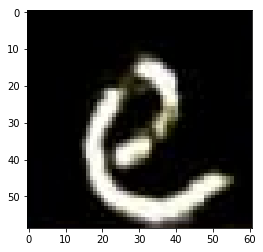

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test/e.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [12]:
cv2.imwrite('einvert.png',img)

True

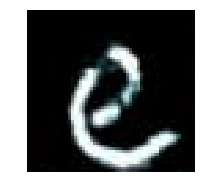

In [13]:
img = open_image("einvert.png")
img.show()

In [14]:
learn.predict(img)

('1',
 tensor(1),
 tensor([1.6496, 1.9174, 0.8923, 1.1812, 1.0827, 0.7494, 1.1684, 0.5433, 0.7901,
         0.7334, 0.9230, 0.7961, 1.2652, 0.3404, 0.7011, 1.0127, 1.9009, 0.7630,
         0.5450, 0.4453]))

In [15]:
img.shape

torch.Size([3, 59, 61])

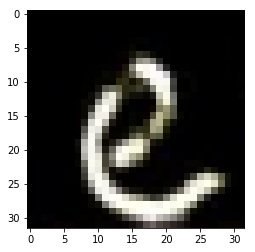

In [16]:
img = cv2.imread('einvert.png')
img = cv2.resize(img, (32,32))
plt.imshow(img)

In [17]:
cv2.imwrite('einvert32x32.png',img)

True

In [18]:
img = open_image("einvert32x32.png")
learn.predict(img)

('H',
 tensor(16),
 tensor([0.6335, 0.3707, 2.0708, 0.6468, 0.7072, 0.6054, 1.2430, 0.5305, 1.3067,
         0.8092, 1.2468, 0.8171, 0.8900, 0.5322, 0.7599, 1.4498, 3.2870, 1.0288,
         0.4766, 0.5425]))

In [19]:
#! rm 4.png*
#! wget http://yourstorage.blob.core.windows.net/ficheros/4.png

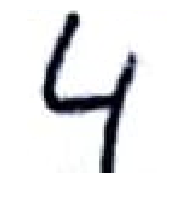

In [20]:
img = open_image("test/4.png")
img.show()

In [21]:
learn.predict(img)

('H',
 tensor(16),
 tensor([0.6614, 0.5464, 1.2676, 0.8364, 0.7749, 1.3357, 0.9110, 1.2691, 0.4051,
         0.8875, 0.7157, 0.6534, 1.1466, 0.3639, 0.6479, 2.0072, 2.1912, 1.7685,
         0.8960, 0.8881]))

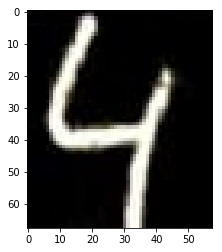

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test/4.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [23]:
cv2.imwrite('4invert.png',img)

True

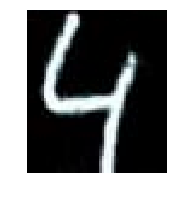

In [24]:
img = open_image("4invert.png")
img.show()

In [25]:
learn.predict(img)

('3',
 tensor(3),
 tensor([0.3587, 0.2404, 1.4168, 1.7474, 0.7060, 0.9271, 0.4308, 0.6505, 0.2994,
         0.5209, 0.4521, 0.5368, 1.3624, 0.5752, 0.8175, 1.6053, 1.6311, 0.6703,
         0.6377, 0.7140]))

In [26]:
img.shape

torch.Size([3, 68, 58])

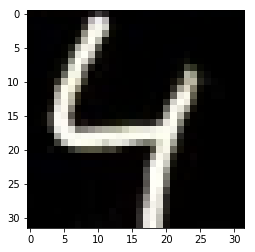

In [27]:
img = cv2.imread('4invert.png')
img = cv2.resize(img, (32,32))
plt.imshow(img)

In [28]:
cv2.imwrite('4invert32x32.png',img)

True

In [29]:
img = open_image("4invert32x32.png")
learn.predict(img)

('3',
 tensor(3),
 tensor([0.7296, 0.4089, 1.3300, 2.9299, 0.5909, 0.4251, 1.0064, 0.5101, 1.5365,
         0.6405, 0.8217, 0.9675, 1.2930, 0.9579, 1.1592, 2.3170, 1.9587, 1.2356,
         0.8547, 1.3255]))

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict(image_path):
    img = cv2.imread(image_path)
    img = cv2.bitwise_not(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    cv2.imwrite('invert.png',img)
    img = open_image("invert.png")
    img.show()
    img = cv2.imread('invert.png')
    img = cv2.resize(img, (32,32))
    plt.imshow(img)
    cv2.imwrite('invert32x32.png',img)
    img = open_image("invert32x32.png")
    return learn.predict(img)

('3',
 tensor(3),
 tensor([0.7296, 0.4089, 1.3300, 2.9299, 0.5909, 0.4251, 1.0064, 0.5101, 1.5365,
         0.6405, 0.8217, 0.9675, 1.2930, 0.9579, 1.1592, 2.3170, 1.9587, 1.2356,
         0.8547, 1.3255]))

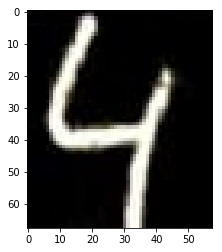

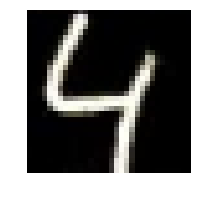

In [31]:
predict('test/4.png')

('H',
 tensor(16),
 tensor([0.6335, 0.3707, 2.0708, 0.6468, 0.7072, 0.6054, 1.2430, 0.5305, 1.3067,
         0.8092, 1.2468, 0.8171, 0.8900, 0.5322, 0.7599, 1.4498, 3.2870, 1.0288,
         0.4766, 0.5425]))

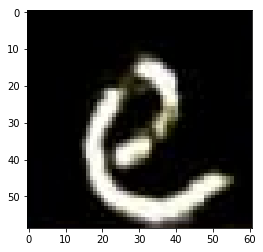

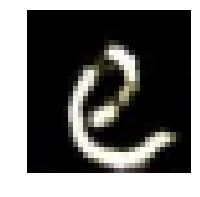

In [32]:
predict('test/e.png')

('3',
 tensor(3),
 tensor([0.4847, 0.4503, 1.7680, 3.0840, 0.8337, 0.5634, 1.3357, 1.0377, 0.6205,
         0.7821, 0.8782, 1.0254, 0.4921, 0.5660, 0.9350, 1.1631, 2.7728, 0.9507,
         0.5860, 0.7153]))

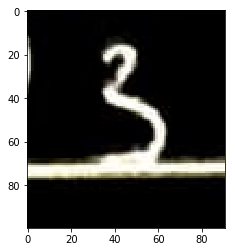

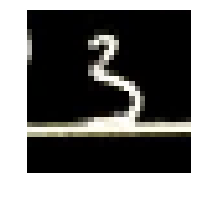

In [33]:
predict('test/3-underline.png')

('G',
 tensor(15),
 tensor([0.4883, 0.6032, 1.7948, 1.4584, 0.6892, 0.3880, 0.7155, 0.9755, 0.9304,
         0.4777, 0.3681, 0.8671, 0.9901, 0.5733, 1.6467, 2.2098, 1.7355, 1.2122,
         1.2969, 2.1418]))

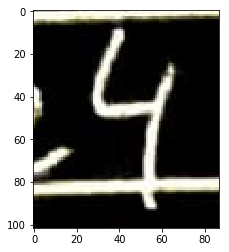

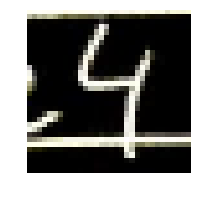

In [34]:
predict('test/4-upper-underline.png')

('H',
 tensor(16),
 tensor([0.3547, 0.2022, 1.0048, 2.5459, 0.4244, 0.3219, 1.0347, 1.0475, 0.9619,
         0.8497, 0.3129, 0.8658, 1.4401, 0.7350, 0.9628, 1.9228, 2.7288, 1.4654,
         1.2073, 1.7438]))

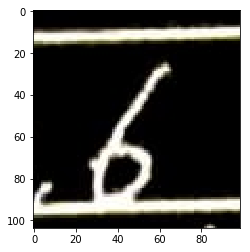

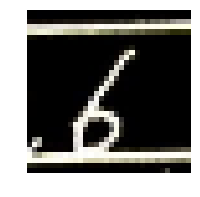

In [35]:
predict('test/6-upper-underline.png')

('G',
 tensor(15),
 tensor([0.6152, 0.3609, 1.1692, 1.9006, 0.3751, 0.4202, 0.8964, 1.2531, 1.4352,
         0.9945, 0.5237, 0.9714, 0.9126, 0.3834, 1.3820, 2.1313, 1.4688, 0.8277,
         1.1318, 1.2197]))

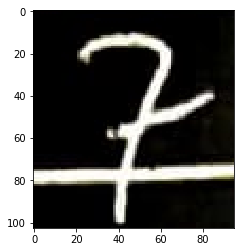

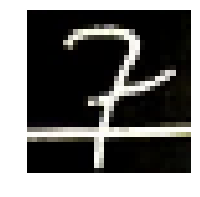

In [36]:
predict('test/7-underline.png')

('H',
 tensor(16),
 tensor([0.2817, 0.2096, 1.1650, 1.7930, 0.5325, 0.0988, 0.8437, 1.4215, 0.4350,
         0.7620, 0.2920, 0.5750, 1.6625, 0.4229, 0.8479, 1.5599, 2.5820, 2.5031,
         1.9242, 1.5150]))

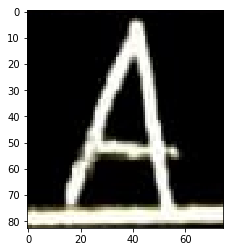

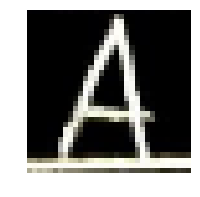

In [37]:
predict('test/a-underline.png')

('H',
 tensor(16),
 tensor([0.4563, 0.2610, 1.7695, 1.7345, 0.4073, 0.4136, 1.2032, 1.2700, 0.6281,
         0.8230, 0.6395, 1.2614, 0.8870, 0.7215, 0.9384, 2.0269, 2.4719, 1.4032,
         1.0571, 1.1383]))

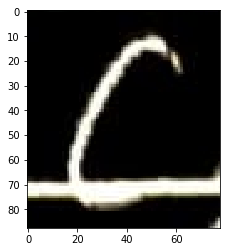

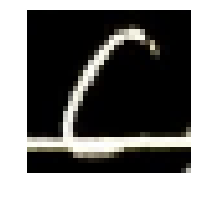

In [38]:
predict('test/c-underline.png')

('3',
 tensor(3),
 tensor([0.6871, 0.5768, 1.1194, 2.2978, 0.6552, 0.5516, 0.8162, 1.2609, 1.1567,
         0.7619, 0.4077, 1.2565, 0.6958, 0.3729, 1.2940, 1.4191, 1.6274, 1.0506,
         1.5162, 0.8904]))

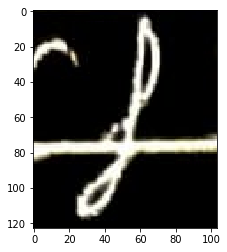

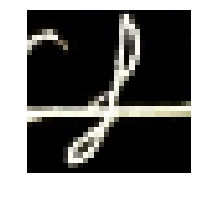

In [39]:
predict('test/f-underline.png')

('3',
 tensor(3),
 tensor([0.5949, 0.4098, 1.6020, 2.2830, 0.6911, 0.5251, 0.9991, 0.9066, 1.0258,
         0.8550, 0.5609, 0.7559, 1.0982, 0.5397, 1.6663, 1.8584, 2.0390, 1.6484,
         1.2062, 1.5299]))

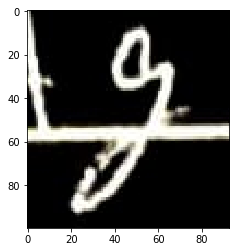

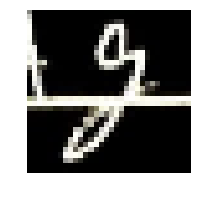

In [40]:
predict('test/g-underline-2.png')

('G',
 tensor(15),
 tensor([0.4014, 0.2497, 1.4790, 1.8410, 0.7024, 0.3853, 1.6844, 0.7433, 1.2900,
         1.4157, 0.5071, 0.4794, 1.4046, 0.4961, 0.9176, 1.9920, 1.9373, 1.7090,
         0.7200, 1.3015]))

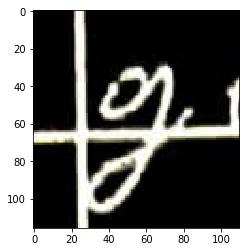

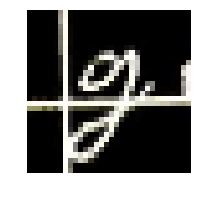

In [41]:
predict('test/g-underline.png')